In [17]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid")
pd.options.display.float_format = '{:20,.2f}'.format
warnings.filterwarnings('ignore')

In [4]:
train_labels = pd.read_csv('../../datasets/train_labels.csv')

In [6]:
train_values = pd.read_csv('../../datasets/train_values.csv')

In [7]:
anio_edificaciones_mas_antiguas = train_values['age'].max()

In [8]:
anio_edificaciones_mas_antiguas

995

In [9]:
edificaciones_mas_antiguas = train_values.loc[(train_values['age']==anio_edificaciones_mas_antiguas),'building_id']

In [10]:
edificaciones_mas_antiguas = train_labels.merge(edificaciones_mas_antiguas, how='inner')

In [18]:
grado_danio_edificaciones_mas_antiguas = edificaciones_mas_antiguas\
    .groupby('damage_grade')\
    .agg('count')\
    .rename(columns={'building_id':'cantidad_de_edificaciones'})

In [12]:
grado_danio_edificaciones_mas_antiguas

,cantidad_de_edificaciones
damage_grade,
1,179
2,822
3,389


In [13]:
df_train_merged=train_values.merge(train_labels)

In [14]:
df_graf=df_train_merged.loc[df_train_merged['age']>900,('damage_grade')].value_counts()

In [15]:
df_graf

2    822
3    389
1    179
Name: damage_grade, dtype: int64

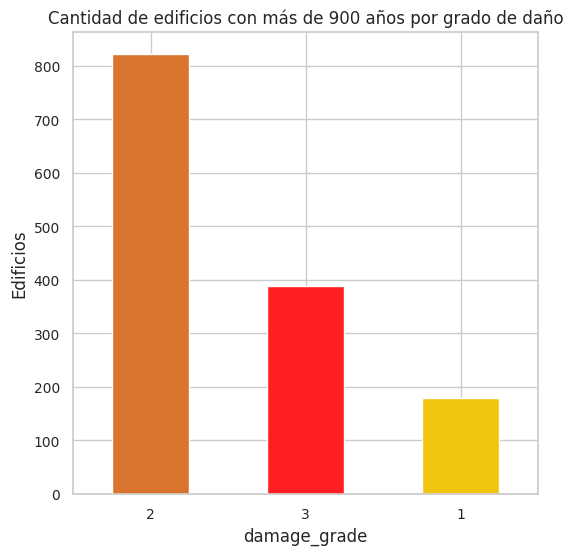

In [19]:
df_graf.plot(
    kind='bar',
    figsize=(6,6),
    rot=0,
    title='Cantidad de edificios con más de 900 años por grado de daño',
    color=[ '#da732e','#ff1e23','#f1c40f']
);
ax=plt.gca()
ax.set_ylabel('Edificios');
ax.set_xlabel('damage_grade')
plt.tick_params(labelsize=10)